In [52]:
import pandas as pd #importing pandas into notebook
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [6]:
house_price_df=pd.read_csv('house_price.csv') #to read the file into the notebook
house_price_df.dtypes #data frame datatypes
house_price_df.columns #name of columns in the df



Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
house_price_df['LotArea'].dtype #to check the datatype of a particular column

dtype('int64')

In [8]:

house_price_df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [9]:
#ANOVA FOR MSZoning and SALEPRICE
from scipy.stats import f_oneway
RL_list=list(house_price_df[house_price_df['MSZoning']=='RL']['SalePrice'])
RM_list=list(house_price_df[house_price_df['MSZoning']=='RM']['SalePrice'])
FV_list=list(house_price_df[house_price_df['MSZoning']=='FV']['SalePrice'])
RH_list=list(house_price_df[house_price_df['MSZoning']=='RH']['SalePrice'])
C_all_list=list(house_price_df[house_price_df['MSZoning']=='C (all)']['SalePrice'])
f_oneway(RL_list,RM_list,FV_list,RH_list,C_all_list)



F_onewayResult(statistic=43.84028167245718, pvalue=8.817633866272648e-35)

In [10]:
cat_cols=[col for col in house_price_df.columns if house_price_df[col].dtype=='object']
cat_cols


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
def anova(col):
    categories=list(house_price_df[col].value_counts().index)
    res=f_oneway(*[house_price_df[house_price_df[col]==category]['SalePrice'] for category in categories])
    return res[1]
anova('MSZoning')


                   

8.817633866272648e-35

In [12]:
p_values=[anova(col) for col in cat_cols]
p_values

[8.817633866272648e-35,
 0.11704860406782483,
 4.899826166771113e-08,
 6.447523852011766e-25,
 2.7422167521379096e-08,
 0.5847167739689381,
 3.163167473604189e-06,
 0.1413963584114019,
 1.558600282771154e-225,
 8.904549416138853e-08,
 0.043425658360948464,
 2.0567364604967015e-10,
 3.376776535121222e-25,
 3.653523047099125e-17,
 7.231444779987188e-08,
 2.5860887286376316e-43,
 4.8421856706985465e-43,
 4.793331178118786e-65,
 1.4395510967787893e-204,
 5.106680608671862e-07,
 5.791895002232233e-91,
 9.610615106781709e-186,
 5.136900937703027e-09,
 1.022670629183227e-42,
 1.8077310066862167e-63,
 0.019410089690234594,
 0.000753472106445497,
 2.667062092104357e-67,
 1.8095061559267854e-22,
 1.6632487814737638e-18,
 3.0322127528400614e-192,
 0.0004841696801078294,
 5.016300447019087e-19,
 1.247153670658973e-66,
 1.1991165312294262e-93,
 1.2408026478015653e-07,
 1.3097143055289643e-07,
 1.803568890651533e-18,
 0.30398528011207915,
 0.002312645635631918,
 0.10472761568792907,
 5.0397668894624

In [13]:
anova_df=pd.DataFrame({'Cat_Col':cat_cols,'p_value':p_values})
anova_df

,Cat_Col,p_value
0,MSZoning,8.817634e-35
1,Street,1.170486e-01
2,Alley,4.899826e-08
3,LotShape,6.447524e-25
4,LandContour,2.742217e-08
5,Utilities,5.847168e-01
6,LotConfig,3.163167e-06
7,LandSlope,1.413964e-01
8,Neighborhood,1.558600e-225
9,Condition1,8.904549e-08


In [14]:
anova_correlated_cols=list(anova_df[anova_df['p_value']<0.05]['Cat_Col'])
anova_correlated_cols

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [15]:
house_price_df.isnull().sum()   #missing value count

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [16]:
y=house_price_df['SalePrice'] #output into another variable
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [17]:
house_price_df['LotFrontage'].dtype

dtype('float64')

In [18]:
identical_cols=[]      #finding identical columns
for col in house_price_df.columns:
    if house_price_df[col].nunique()==1 or house_price_df[col].nunique()==house_price_df.shape[0]:
        identical_cols.append(col)
identical_cols


['Id']

In [19]:
na_df=pd.DataFrame({'Column_name':house_price_df.columns,'Missing_value_count':house_price_df.isnull().sum(),  #finding columns >than 50%
                  'Missing_value_percent':house_price_df.isnull().sum()/house_price_df.shape[0]*100})
cols_grt_50=(na_df[na_df['Missing_value_percent']>50]['Column_name'].index)
cols_grt_50

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [20]:
house_price_df.drop(columns='SalePrice',inplace=True)

In [21]:
house_price_df.drop(columns=identical_cols,inplace=True)




In [22]:
house_price_df.drop(columns=cols_grt_50,inplace=True)

In [23]:
cat_cols=[col for col in house_price_df.columns if house_price_df[col].dtype=='object']

In [24]:
con_cols=[col for col in house_price_df.columns if house_price_df[col].dtype=='int64' or house_price_df[col].dtype=='float64']

In [25]:
#train-test-split
X_train,X_test,y_train,y_test=train_test_split(house_price_df,y,test_size=0.2,random_state=42)


In [26]:
for col in con_cols:                                                   #filling missing continous variables with mean
    X_train[col]=X_train[con_cols].fillna(X_train[col].mean())
    X_test[col]=X_test[con_cols].fillna(X_train[col].mean())
   

In [27]:
for col in cat_cols:                                                 #filling categorical variables with mode
    X_train[col]=X_train[cat_cols].fillna(X_train[col].mode())
    X_test[col]=X_test[cat_cols].fillna(X_train[col].mode())
    

In [28]:
import numpy as np                                    #standard scaling for continuous variables
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std=StandardScaler()
for col in con_cols:
    X_train[col]=std.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col]=std.transform(np.array(X_test[col]).reshape(-1,1))

In [29]:
one_hot_train=pd.get_dummies(X_train[cat_cols])
one_hot_test=pd.get_dummies(X_test[cat_cols])

In [30]:
one_hot_train_final,one_hot_test_final=one_hot_train.align(one_hot_test,join='inner',axis=1,fill_value=0)

In [31]:
X_train_final=pd.concat([X_train[con_cols],one_hot_train_final],axis=1)
X_test_final=pd.concat([X_test[con_cols],one_hot_test_final],axis=1)

In [32]:
from sklearn.linear_model import LinearRegression      #linear regression 
linreg=LinearRegression() 
linreg.fit(X_train_final,y_train)
pred=linreg.predict(X_test_final)
#r2_score(y_test,pred)
print('Train Score',linreg.score(X_train_final,y_train))
print('Test Score',linreg.score(X_test_final,y_test))

Train Score 0.04235112396455476
Test Score 0.08844503731083764


In [33]:
from sklearn.tree import DecisionTreeRegressor   #decision tree
tree=DecisionTreeRegressor(max_depth=4)
tree.fit(X_train_final,y_train)
tree.predict(X_test_final)
print('train_score',tree.score(X_train_final,y_train))
print('test_score',tree.score(X_test_final,y_test))

train_score 0.24845620107266708
test_score 0.24521895201507216


In [34]:
from sklearn.model_selection import GridSearchCV    #decision tree grid search
param_dict_tree={'max_depth':[1,3,4,5,6],
                'min_samples_leaf':[2,4,5,7,8],
                'min_samples_split':[2,3,4,5,6],
                'max_features':["auto","sqrt","log2"]}
gdcv_tree=GridSearchCV(tree,param_grid=param_dict_tree,cv=3)
gdcv_tree.fit(X_train_final,y_train)
gdcv_tree.predict(X_test_final)
gdcv_tree.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [35]:
from sklearn.model_selection import RandomizedSearchCV                 #decision tree randomized search
param_dict_tree={'max_depth':[1,3,4,5,6],
                'min_samples_leaf':[2,4,5,7,8],
                'min_samples_split':[2,3,4,5,6],
                'max_features':["auto","sqrt","log2"]}
rscv_tree=RandomizedSearchCV(tree,param_distributions=param_dict_tree,cv=3,n_iter=5)
rscv_tree.fit(X_train_final,y_train)
rscv_tree.predict(X_test_final)


array([185836.66504854, 237170.09589041,  97927.27272727, 125468.88888889,
       185836.66504854, 110142.85714286, 151471.85294118, 163336.48148148,
       110142.85714286, 151471.85294118, 151471.85294118, 185836.66504854,
        56950.        , 185836.66504854, 237170.09589041, 185836.66504854,
       237170.09589041, 185836.66504854,  97927.27272727, 185836.66504854,
       185836.66504854, 252474.52380952, 237170.09589041, 185836.66504854,
       185836.66504854, 207645.7826087 , 185836.66504854, 185836.66504854,
       237170.09589041, 241600.        , 151471.85294118, 237170.09589041,
       151471.85294118, 185836.66504854, 185836.66504854, 185836.66504854,
       151471.85294118, 237170.09589041, 237170.09589041, 127625.        ,
       125468.88888889, 237170.09589041, 185836.66504854, 185836.66504854,
       185836.66504854, 138931.04545455, 185836.66504854, 185836.66504854,
       237170.09589041, 151471.85294118, 185836.66504854, 185836.66504854,
       107854.54545455, 1

In [39]:
adaboost=AdaBoostRegressor()               #Adaboost Regressor
param_boost={'n_estimators':[20,30,40,50],
            'learning_rate':[0.01,0.1]}
gdcv_boost=GridSearchCV(adaboost,param_grid=param_boost,cv=3,verbose=3)
gdcv_boost.fit(X_train_final,y_train)
gdcv_boost.predict(X_test_final)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] learning_rate=0.01, n_estimators=20 .............................
[CV] . learning_rate=0.01, n_estimators=20, score=0.207, total=   0.1s
[CV] learning_rate=0.01, n_estimators=20 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . learning_rate=0.01, n_estimators=20, score=0.230, total=   0.1s
[CV] learning_rate=0.01, n_estimators=20 .............................
[CV] . learning_rate=0.01, n_estimators=20, score=0.211, total=   0.1s
[CV] learning_rate=0.01, n_estimators=30 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] . learning_rate=0.01, n_estimators=30, score=0.215, total=   0.2s
[CV] learning_rate=0.01, n_estimators=30 .............................
[CV] . learning_rate=0.01, n_estimators=30, score=0.223, total=   0.2s
[CV] learning_rate=0.01, n_estimators=30 .............................
[CV] . learning_rate=0.01, n_estimators=30, score=0.210, total=   0.2s
[CV] learning_rate=0.01, n_estimators=40 .............................
[CV] . learning_rate=0.01, n_estimators=40, score=0.215, total=   0.2s
[CV] learning_rate=0.01, n_estimators=40 .............................
[CV] . learning_rate=0.01, n_estimators=40, score=0.230, total=   0.2s
[CV] learning_rate=0.01, n_estimators=40 .............................
[CV] . learning_rate=0.01, n_estimators=40, score=0.209, total=   0.3s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] . learning_rate=0.01, n_estimators=50, score=0.172, total=   0.3s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.3s finished


array([187243.43438914, 239557.95652174, 107250.92592593, 124138.0952381 ,
       187243.43438914, 109279.31034483, 138289.78947368, 173275.92735043,
       109279.31034483, 138289.78947368, 138289.78947368, 187243.43438914,
       138289.78947368, 187243.43438914, 239557.95652174, 187243.43438914,
       239557.95652174, 187243.43438914, 107250.92592593, 187243.43438914,
       187243.43438914, 239557.95652174, 239557.95652174, 187243.43438914,
       187243.43438914, 173275.92735043, 187243.43438914, 187243.43438914,
       239557.95652174, 173275.92735043, 138289.78947368, 239557.95652174,
       138289.78947368, 187243.43438914, 187243.43438914, 187243.43438914,
       138289.78947368, 239557.95652174, 239557.95652174, 116570.        ,
       124138.0952381 , 239557.95652174, 187243.43438914, 187243.43438914,
       187243.43438914, 146257.36734694, 187243.43438914, 187243.43438914,
       239557.95652174, 138289.78947368, 187243.43438914, 187243.43438914,
       108964.70588235, 1

In [40]:
gdcv_boost.best_params_

{'learning_rate': 0.01, 'n_estimators': 40}

In [43]:
rscv_boost=RandomizedSearchCV(adaboost,param_distributions=param_boost,cv=3,n_iter=12)  #Adaboost Randomized search
rscv_boost.fit(X_train_final,y_train)
rscv_boost.predict(X_test_final)
                   

array([187024.41843972, 240849.83829787, 103116.37931034, 127148.30379747,
       187024.41843972, 111060.        , 138821.16853933, 171997.1965812 ,
       111060.        , 138821.16853933, 138821.16853933, 187024.41843972,
       138529.35779817, 187024.41843972, 240849.83829787, 187024.41843972,
       240849.83829787, 187024.41843972, 103116.37931034, 187024.41843972,
       187024.41843972, 240849.83829787, 240849.83829787, 187024.41843972,
       187024.41843972, 171997.1965812 , 187024.41843972, 187024.41843972,
       240849.83829787, 171953.95238095, 138821.16853933, 240849.83829787,
       138821.16853933, 187024.41843972, 187024.41843972, 187024.41843972,
       138821.16853933, 240849.83829787, 240849.83829787, 119767.39130435,
       127148.30379747, 240849.83829787, 187024.41843972, 187024.41843972,
       187024.41843972, 140851.8313253 , 187024.41843972, 187024.41843972,
       240849.83829787, 138821.16853933, 187024.41843972, 187024.41843972,
       110742.85714286, 1

In [51]:
kmeans=KMeans()                    #K-means
kmeans.fit(X_train_final)
num_clusters=range(2,14)
wss=[]
for n in num_clusters:
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(X_train_final)
    wss.append(kmeans.inertia_)
wss

[28001.089510927282,
 18564.549538964897,
 11555.001409188355,
 8959.244071649104,
 6780.270722362854,
 5295.577592651015,
 4464.405140672522,
 3645.6973161916253,
 2899.6407328710475,
 2207.499497529555,
 1793.442250577745,
 1554.0333573988664]

Text(0, 0.5, 'WSS')

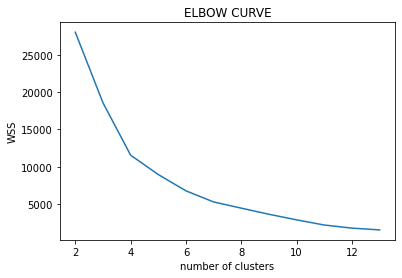

In [57]:
#plotting elbow curve for k-nearest neighbours
plt.plot(num_clusters,wss)  
plt.title('ELBOW CURVE')
plt.xlabel('number of clusters')
plt.ylabel('WSS')

In [62]:
#K-nearest neighbours
kmeans_1=KMeans(n_clusters=9)
kmeans_1.fit(X_train_final)
kmeans_pred=kmeans.predict(X_test_final)